In [43]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the data
with open('../scripts/data.pickle', 'rb') as f:
    data = pickle.load(f)

COLOR_MUTANT = '#ff7f0e'
COLOR_SHAM = '#1f77b4'

### Figure 4

In [44]:
# Data on the rate of visting state 1
states_sham = np.concatenate([np.array([x['phase_1']['states'] for x in data['sham']]), 
                              np.array([x['phase_2']['states'] for x in data['sham']])], axis=1)
rate_of_visit_state_1_sham_avg = states_sham.mean(axis=0)[:, 0]
rate_of_visit_state_1_sham_std = states_sham.std(axis=0)[:, 0]/np.sqrt(states_sham.shape[0])

states_mutant = np.concatenate([np.array([x['phase_1']['states'] for x in data['mutant']]), 
                              np.array([x['phase_2']['states'] for x in data['mutant']])], axis=1)
rate_of_visit_state_1_mutant_avg = states_mutant.mean(axis=0)[:, 0]
rate_of_visit_state_1_mutant_std = states_mutant.std(axis=0)[:, 0]/np.sqrt(states_mutant.shape[0])

## 1D moving average
window_size = 300
rate_of_visit_state_1_sham_avg = np.convolve(rate_of_visit_state_1_sham_avg, np.ones(window_size)/window_size, mode='valid')
rate_of_visit_state_1_mutant_avg = np.convolve(rate_of_visit_state_1_mutant_avg, np.ones(window_size)/window_size, mode='valid')
rate_of_visit_state_1_sham_std = np.convolve(rate_of_visit_state_1_sham_std, np.ones(window_size)/window_size, mode='valid')
rate_of_visit_state_1_mutant_std = np.convolve(rate_of_visit_state_1_mutant_std, np.ones(window_size)/window_size, mode='valid')

In [45]:
# Data on the weights during training
weights_sham = np.concatenate([np.array([x['phase_1']['weights'] for x in data['sham']]), 
                              np.array([x['phase_2']['weights'] for x in data['sham']])], axis=1)
w1_sham_avg, w2_sham_avg = weights_sham.mean(axis=0).T
w1_sham_std, w2_sham_std = weights_sham.std(axis=0).T

weights_mutant = np.concatenate([np.array([x['phase_1']['weights'] for x in data['mutant']]), 
                              np.array([x['phase_2']['weights'] for x in data['mutant']])], axis=1)
w1_mutant_avg, w2_mutant_avg = weights_mutant.mean(axis=0).T
w1_mutant_std, w2_mutant_std = weights_mutant.std(axis=0).T

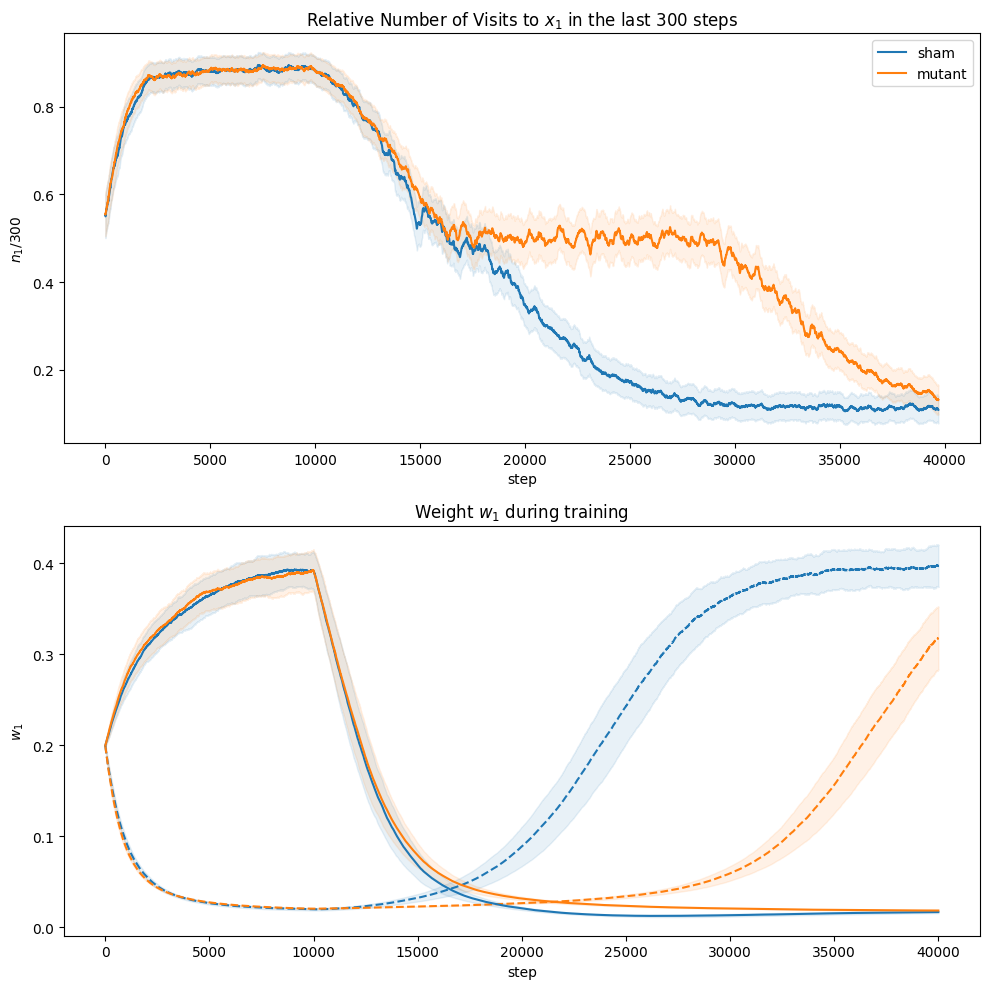

In [46]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(rate_of_visit_state_1_sham_avg, label='sham', c=COLOR_SHAM)
ax[0].fill_between(np.arange(len(rate_of_visit_state_1_sham_avg)), rate_of_visit_state_1_sham_avg - rate_of_visit_state_1_sham_std, rate_of_visit_state_1_sham_avg + rate_of_visit_state_1_sham_std, alpha=0.1, color=COLOR_SHAM)
ax[0].plot(rate_of_visit_state_1_mutant_avg, label='mutant', c=COLOR_MUTANT)
ax[0].fill_between(np.arange(len(rate_of_visit_state_1_mutant_avg)), rate_of_visit_state_1_mutant_avg - rate_of_visit_state_1_mutant_std, rate_of_visit_state_1_mutant_avg + rate_of_visit_state_1_mutant_std, alpha=0.1, color=COLOR_MUTANT)

ax[0].set_title("Relative Number of Visits to $x_1$ in the last 300 steps")
ax[0].set_xlabel('step')
ax[0].set_ylabel('$n_1$/300')
ax[0].legend()

ax[1].plot(w1_sham_avg, label='sham', c=COLOR_SHAM, ls = '--')
ax[1].fill_between(np.arange(len(w1_sham_avg)), w1_sham_avg - w1_sham_std, w1_sham_avg + w1_sham_std, alpha=0.1, color=COLOR_SHAM)
ax[1].plot(w1_mutant_avg, label='mutant', c=COLOR_MUTANT, ls = '--')
ax[1].fill_between(np.arange(len(w1_mutant_avg)), w1_mutant_avg - w1_mutant_std, w1_mutant_avg + w1_mutant_std, alpha=0.1, color=COLOR_MUTANT)

ax[1].plot(w2_sham_avg, c=COLOR_SHAM)
ax[1].fill_between(np.arange(len(w2_sham_avg)), w2_sham_avg - w2_sham_std, w2_sham_avg + w2_sham_std, alpha=0.1, color=COLOR_SHAM)
ax[1].plot(w2_mutant_avg, c=COLOR_MUTANT)
ax[1].fill_between(np.arange(len(w2_mutant_avg)), w2_mutant_avg - w2_mutant_std, w2_mutant_avg + w2_mutant_std, alpha=0.1, color=COLOR_MUTANT)

ax[1].set_title("Weight $w_1$ during training")
ax[1].set_xlabel('step')
ax[1].set_ylabel('$w_1$')

plt.tight_layout()
plt.show()


## Figure 5 - left

In [86]:
# Data on the weights for sham, during phase 2
weights_sham = np.array([x['phase_2']['weights'] for x in data['sham']])
w1_sham_avg, w2_sham_avg = weights_sham.mean(axis=0).T
w1_sham_std, w2_sham_std = weights_sham.std(axis=0).T

# Data on the D-serine levels for sham, during phase 2
D0, b = 1, 20
dserine_sham_avg = D0 - b*np.array([x['phase_2']['thetas'] for x in data['sham']]).mean(axis=0)
dserine_sham_std = np.array([x['phase_2']['thetas'] for x in data['sham']]).std(axis=0)/np.sqrt(len(data['sham']))

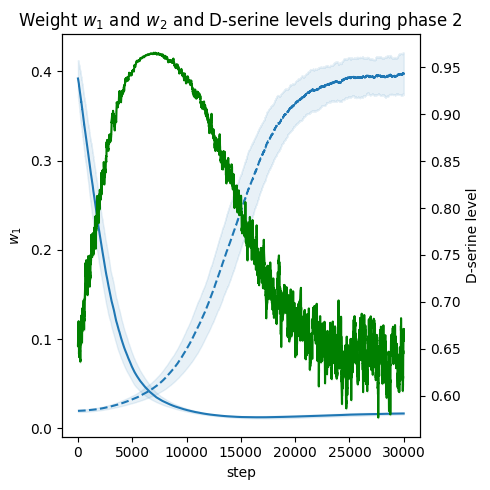

In [87]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(w1_sham_avg, label='sham', c=COLOR_SHAM, ls = '--')
ax.fill_between(np.arange(len(w1_sham_avg)), w1_sham_avg - w1_sham_std, w1_sham_avg + w1_sham_std, alpha=0.1, color=COLOR_SHAM)

ax.plot(w2_sham_avg, c=COLOR_SHAM)
ax.fill_between(np.arange(len(w2_sham_avg)), w2_sham_avg - w2_sham_std, w2_sham_avg + w2_sham_std, alpha=0.1, color=COLOR_SHAM)

ax2 = ax.twinx()
ax2.plot(dserine_sham_avg, c='green')
ax2.fill_between(np.arange(len(dserine_sham_avg)), dserine_sham_avg - dserine_sham_std, dserine_sham_avg + dserine_sham_std, alpha=0.1, color='green')

ax.set_title("Weight $w_1$ and $w_2$ and D-serine levels during phase 2")
ax.set_xlabel('step')
ax.set_ylabel('$w_1$')
ax2.set_ylabel('D-serine level')

plt.tight_layout()
plt.show()
